# Data Processing using Pandas and Chardet

## Purpose:
This Python script reads a CSV file, processes the data, and performs the following tasks:
1. Calculating summary statistics (mean, median, standard deviation).
2. Data filtering based on specific criteria.
3. Generating data visualizations like histograms or bar charts.
4. Saving the processed data to a new file.

## Dependencies:
- pandas: Data manipulation library
- chardet: Character encoding detection library
- matplotlib.pyplot: Data visualization library for creating histograms

## Functions:

### 1. detect_encoding(file_path)
   - Purpose: Detects the encoding of a file.
   - Parameters:
     - file_path (str): The path to the CSV file.
   - Returns:
     - str: The detected encoding.

### 2. process_data(file_path, column_name)
   - Purpose: Reads a CSV file, filters data based on a specified column, calculates summary statistics,
     generates a histogram, and saves the processed data to a new file.
   - Parameters:
     - file_path (str): The path to the CSV file.
     - column_name (str): The column name for data filtering.
   - Returns:
     - tuple: A tuple containing summary statistics DataFrame and filtered data DataFrame.

## Usage:
1. Run the script.
2. Enter the complete file path of the CSV file when prompted.
3. Enter the column name for filtering when prompted.
4. View the summary statistics and filtered data in the console.
5. A histogram of the specified column is displayed.
6. The processed data is saved to a new file named 'processed_data.csv'.

## Tasks:

### Calculating Summary Statistics:
  - The script calculates summary statistics (mean, median, standard deviation) for the specified column.
### Data Filtering:
  - Data is filtered based on a user-specified criteria (example: values in the specified column > 100).
### Generating Data Visualizations:
  - A histogram is generated for the specified column, providing a visual representation of the data distribution.
### Saving Processed Data:
  - The filtered data is saved to a new CSV file named 'processed_data.csv'.

## Note:
- Ensure that the specified column name exists in the dataset.
- The script may prompt to install missing dependencies if not already installed.
"""
import pandas as pd
import chardet
import matplotlib.pyplot as plt

## ... (rest of the code)


Enter the file path: C:\Users\Skandan\sales_data_sample.csv
Enter the column name for filtering: SALES


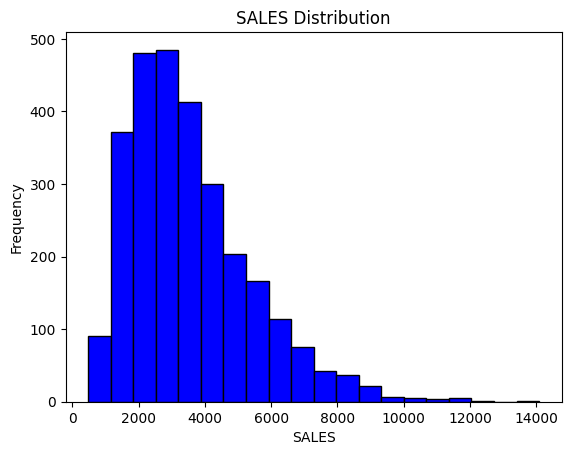


Summary Statistics:
              SALES
count   2823.000000
mean    3553.889072
std     1841.865106
min      482.130000
25%     2203.430000
50%     3184.800000
75%     4508.000000
max    14082.800000

Filtered Data:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               3

In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

def process_data(file_path, column_name):
    # Detect encoding
    encoding = detect_encoding(file_path)

    # Read the dataset with detected encoding
    data = pd.read_csv(file_path, encoding=encoding)

    # Check if the specified column is in the columns
    if column_name not in data.columns:
        print(f"Error: '{column_name}' column not found in the dataset.")
        return None, None

    # Data filtering based on user-specified criteria
    filtered_data = data[data[column_name] > 100]

    # Calculate summary statistics for the specified column
    summary_stats = data[[column_name]].describe()

    # Generate a histogram for the specified column
    plt.hist(data[column_name], bins=20, color='blue', edgecolor='black')
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    # Save the processed data to a new file
    filtered_data.to_csv('processed_data.csv', index=False)

    return summary_stats, filtered_data

if __name__ == "__main__":
    # Example usage:
    file_path = input("Enter the file path: ")
    column_name = input("Enter the column name for filtering: ")

    summary_stats, filtered_data = process_data(file_path, column_name)

    if summary_stats is not None and filtered_data is not None:
        # Print summary statistics
        print("\nSummary Statistics:")
        print(summary_stats)

        # Print filtered data
        print("\nFiltered Data:")
        print(filtered_data)
